# Описание проекта.

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Описание данных.

Файл /datasets/hypothesis.csv. Скачать датасет  
Hypothesis — краткое описание гипотезы;  
Reach — охват пользователей по 10-балльной шкале;  
Impact — влияние на пользователей по 10-балльной шкале;  
Confidence — уверенность в гипотезе по 10-балльной шкале;  
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

## Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**   
Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.  
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.  
Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.  

Импортируем основные библиотеки для начала работы. Загрузим датасет с помощью конструкции try/except.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
import scipy.stats as stats
import datetime as dt

In [2]:
try:
    data_h = pd.read_csv('/datasets/hypothesis.csv')
except:
    data_h = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 1)
pd.options.display.float_format = '{:,.2f}'.format

Произведем предообработку данных для датасета. Воспользуемся методом info и изучим тип данных каждого столбца датасета.

In [4]:
data_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Воспользуемся методом head(10) и посмотрим на десять строк датасета.

In [5]:
data_h.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Приведем название столбцов к нижнему регистру.

In [6]:
data_h.columns = [x.lower() for x in data_h.columns]

Других замечаний по данным в датасете нет. Можем приступать к анализу данных.

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [7]:
data_h['ICE'] = data_h['impact'] * data_h['confidence'] / data_h['efforts']

display(data_h[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективными гипотезами являются № 8, 0, 7, 6. 

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [8]:
data_h['RICE'] = data_h['reach'] * data_h['impact'] * data_h['confidence'] / data_h['efforts']

display(data_h[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


При применении фреймворка RICE наиболее перспективной гипотезой стала под номером 7. Гипотезы 0 и 6 также остаются актуальными.

Так произошло потому что параметр reach равен 10 ,а у других гипотез он меньше. Следовательно гипотеза под номером 7 является самой сильной. 

## Часть 2. Анализ A/B-теста.

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Задача**  
Проанализируйте A/B-тест:  
1) Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.  
2) Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.  
3) Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.  
4) Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.  
5) Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.  
6) Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.  
7) Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.  
8) Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.  
9) Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.  
10) Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.  
11) Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.  
12) Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.  
13) Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.  
14) Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.  

### Предобработка датасета orders.

In [9]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


В столбце date представлены данные в формате object. Для дальнейшей работы произведем изменение в формат datetime.

In [12]:
orders["date"] = orders["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Далее проверим датасет на наличие дубликатов методом duplicated().sum())

In [13]:
orders.duplicated().sum()

0

Дубликаты в датасете отсутствуют. Далее повторим алгоритм для датасета visitors.

### Предобработка датасета visitors.

In [14]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


В столбце date представлены данные в формате object. Для дальнейшей работы произведем изменение в формат datetime.

In [17]:
visitors["date"] = visitors["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Далее проверим датасет на наличие дубликатов методом duplicated().sum())

In [18]:
visitors.duplicated().sum()

0

Дубликаты в датасете отсутствуют.

## Подготовка к проведению AB теста.

Перед проведением AB теста необходимо учесть попадают ли пользователи в обе группы. Для успешного тестирования и недопустимости искажения результатов необходимо минимизировать количество данных пользователей.

In [19]:
new = len(np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique()))

In [20]:
old = orders['visitorId'].nunique()

In [21]:
user_percent = new / old * 100

In [22]:
print(round(user_percent, 2))

5.63


В обе группы попали 58 пользователей, что составляет 5,63%. Процент пересекающихся пользователей в обеих группах незначителен, примем решение не удалять пользователей.

## Исследование результатов AB теста.

Итак, по условию задания мы провели AB тест и получили результаты. Необходимо исследовать полученные данные. 

### График кумулятивной выручки.

Чтобы исключить проблему подсматривания, анализируют графики метрик. Изучают графики кумулятивных, или накапливаемых данных. Построим график кумулятивной выручки.

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Воспользуемся методом groupby и посчитаем медианное значение выручки за день для каждой группы. 

Выбираем медиану потому что она может найти именно тот показатель, который ближе всего к истинно среднему. На неё не влияют выбивающиеся из общей массы числа, поэтому она считается одним из самых надёжных и устойчивых показателей.

In [23]:
orders.groupby(['date','group'])['revenue'].sum().groupby('group').median()

group
A   112,473.00
B   147,274.00
Name: revenue, dtype: float64

Как видно в группе B выручка больше.

Для того чтобы произвести объединение данных необходимо сравнить совпадают ли даты и группы в таблицах посетителей и заказов. Для этого воспользуемся методом drop_duplicates и отсортируем значения по столбцам date и group. 

In [24]:
orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)

,date,group
0,2019-08-01,A
1,2019-08-01,B
2,2019-08-02,A
3,2019-08-02,B
4,2019-08-03,A
...,...,...
57,2019-08-29,B
58,2019-08-30,A
59,2019-08-30,B
60,2019-08-31,A


Создадим переменную test_group и сравним отличия в датасетах orders и visitors.

In [25]:
test_group = orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True) == \
                        visitors[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)
display(test_group)

,date,group
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
57,True,True
58,True,True
59,True,True
60,True,True


Пары в наших датасетах совпадают, а значит можно производить объединение.

Создадим новый датасет cumulativeData в котором объеденим данные из датасетов orders и visitors.

In [26]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Создадим переменные cumulativeRevenueA и cumulativeRevenueB в которых сохраним в которых сохраните данные о датах, выручке и числе заказов в группах A и B.

In [27]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

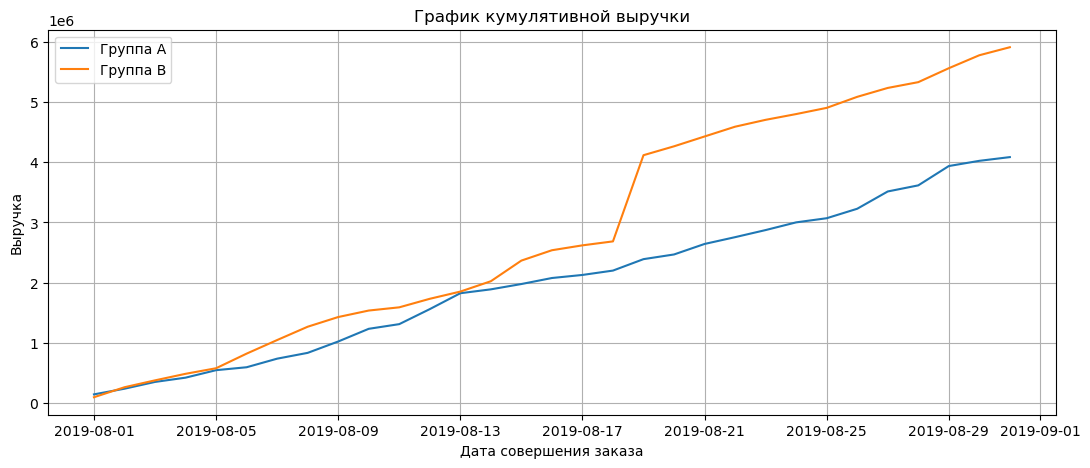

In [28]:
plt.figure(figsize=(13,5))
plt.title('График кумулятивной выручки')
plt.ylabel("Выручка")
plt.xlabel("Дата совершения заказа")
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Группа B')
plt.legend();

Как видно на графике в группе B произошел резкий рост после 17 августа 2019 года. Необходимо проверить заказы в данный период, возможно в наших данных присутствуют аномальные значения. 

Сделаем срез данных с помощью метода query. Исследуем временной промежуток от 18 августа 2019 года до 21 августа 2019 года.

In [29]:
cumulativeRevenueB.query(' "2019-08-17" <= date <= "2019-08-21" ')

,date,revenue,orders
33,2019-08-17,2620790,373
35,2019-08-18,2686621,382
37,2019-08-19,4116541,403
39,2019-08-20,4263815,423
41,2019-08-21,4426892,437


Определим медианное значение для одного заказа 17 августа, отсортируем значения по столбцу revenue в порядке убывания стоимости заказа.

In [30]:
print('Медианное значение заказа 17 августа =',orders.query(' date == "2019-08-17" ')['revenue'].median())
orders.query(' date == "2019-08-17" ').sort_values(by='revenue', ascending=False).head(8)

Медианное значение заказа 17 августа = 4789.5


,transactionId,visitorId,date,revenue,group
188,3634771255,2668501323,2019-08-17,17990,A
225,2931845376,2954449915,2019-08-17,10791,A
203,3630998268,1967724198,2019-08-17,9850,B
149,2368313386,3362039251,2019-08-17,9448,B
127,3437333253,162423694,2019-08-17,9400,B
226,2374285072,4033511429,2019-08-17,9310,B
125,2232016803,428219747,2019-08-17,7990,B
165,565328425,309675944,2019-08-17,6990,B


Медианное значение заказа от 17 августа 2019 года равно 4789.5 Самый дорогой заказ равен 17990. Что не намного больше медианного значения. Продолжаем искать выбросы. Повторим операцию для 18 августа 2019 года. 

In [31]:
print('Медианное значение одного заказа 18 августа =',orders.query(' date == "2019-08-18" ')['revenue'].median())
orders.query(' date == "2019-08-18" ').sort_values(by='revenue', ascending=False).head(8)

Медианное значение одного заказа 18 августа = 2411.0


,transactionId,visitorId,date,revenue,group
294,3709669952,3295038680,2019-08-18,23750,A
267,131747281,2579882178,2019-08-18,19538,B
229,4139571321,737242975,2019-08-18,15850,A
266,2012012971,1516351054,2019-08-18,14400,B
263,2575861846,4256040402,2019-08-18,10970,B
268,3897826085,3927376365,2019-08-18,10450,B
249,1360774578,3234906277,2019-08-18,7555,A
295,3046161180,4142693015,2019-08-18,6350,A


Медианное значение заказа от 18 августа 2019 года равно 2411.0 Самый дорогой заказ равен 23750. Что не намного больше медианного значения. Продолжаем искать выбросы. Повторим операцию для 19 августа 2019 года. 

In [32]:
print('Медианное значение одного заказа 19 августа =',orders.query(' date == "2019-08-19" ')['revenue'].median())
orders.query(' date == "2019-08-19" ').sort_values(by='revenue', ascending=False).head(8)

Медианное значение одного заказа 19 августа = 2630.0


,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B
525,3031564664,393266494,2019-08-19,21550,A
368,3268879337,2536252163,2019-08-19,20026,B
366,2037051350,1957949546,2019-08-19,16770,A


Медианное значение заказа от 19 августа 2019 года равно 2630.0 Самый дорогой заказ равен 1294500. Выброс обнаружен. Также в данный день были заказа с суммами 43990, 33405, 31680. Заказ № 590470918 является аномальным значением. 

### График кумулятивного среднего чека.

Построим график кумулятивного среднего чека по группам. Для этого разделим кумулятивное значение выручки на кумулятивное количество заказов.

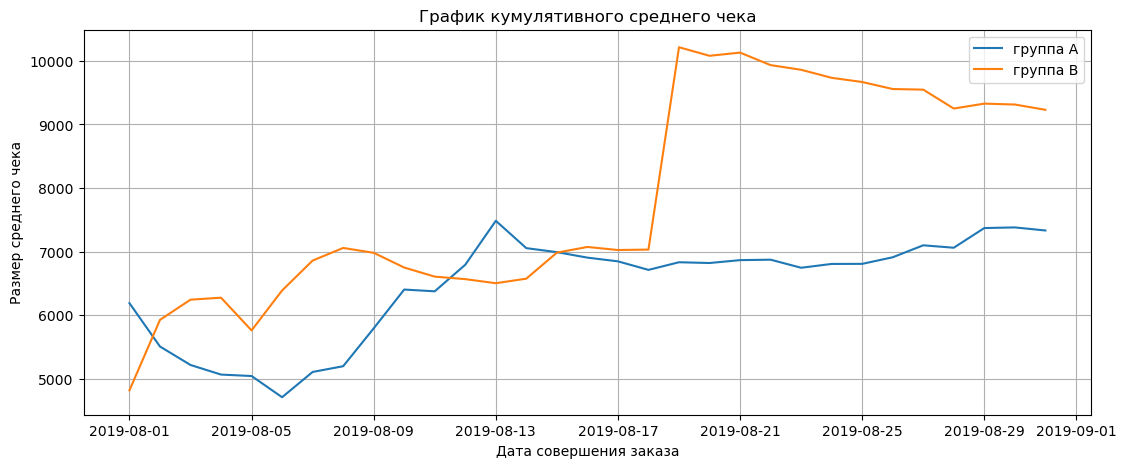

In [33]:
plt.figure(figsize=(13,5))
plt.title('График кумулятивного среднего чека')
plt.ylabel("Размер среднего чека")
plt.xlabel("Дата совершения заказа")
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='группа B')
plt.legend();

Данный график аналогичен предыдущему. После 17 августа 2019 года произошел резкий рост величины среднего чека до 10000. Это связано с аномально большим заказом № 425. Также стоит отметить, что 13 августа 2019 года средний чек больше в группе B. 

In [34]:
cumulativeRevenueA['avg_check'] = cumulativeRevenueA['revenue']/cumulativeRevenueA['orders']

print(' Средний чек 13 августа в группе А =',cumulativeRevenueA.query(' date == "2019-08-13" ')['avg_check'].median())
cumulativeRevenueA.query(' date == "2019-08-13" ').sort_values(by='revenue', ascending=False).head(8)

 Средний чек 13 августа в группе А = 7485.700819672131


,date,revenue,orders,avg_check
24,2019-08-13,1826511,244,"7,485.70"


In [35]:
cumulativeRevenueB['avg_check'] = cumulativeRevenueB['revenue']/cumulativeRevenueB['orders']

print(' Средний чек 13 августа в группе В =',cumulativeRevenueB.query(' date == "2019-08-13" ')['avg_check'].median())
cumulativeRevenueB.query(' date == "2019-08-13" ').sort_values(by='revenue', ascending=False).head(8)

 Средний чек 13 августа в группе В = 6504.343859649123


,date,revenue,orders,avg_check
25,2019-08-13,1853738,285,"6,504.34"


### График относительного изменения кумулятивного среднего чека.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

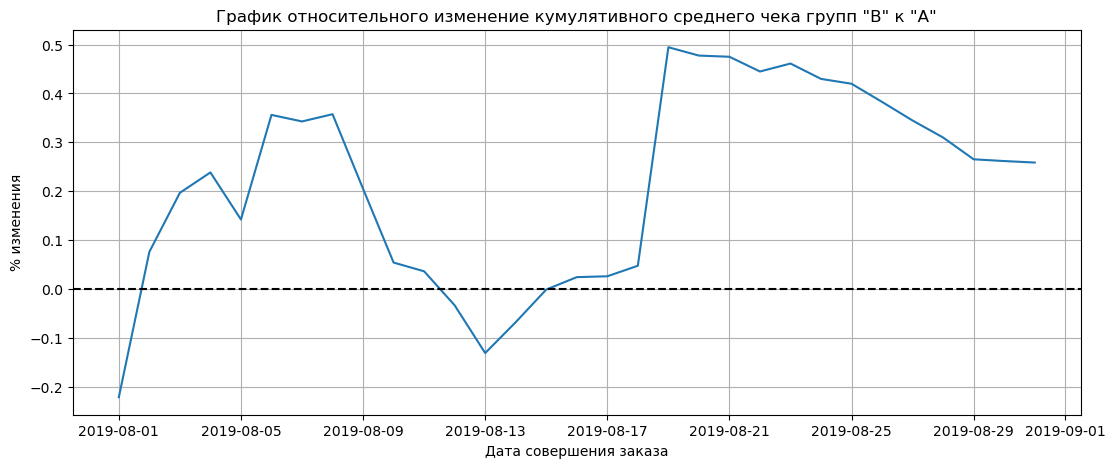

In [36]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(13,5))
plt.ylabel("% изменения")
plt.xlabel("Дата совершения заказа")
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ \
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменение кумулятивного среднего чека групп "B" к "А"')
plt.axhline(y=0, color='black', linestyle='--') ;

На данном графике наблюдаем рост среднего чека группы B с 1 августа 2019 года. 2 августа 2019 года превысил средний чек группы А и рост продолжался до 7 августа 2019 года. Далее произошло падение вплоть до 13 августа 2019 года. После этого наблюдаем плавный рост до 17 августа 2019 года. В эту дату произошел резкий рост, что связано с заказом № 590470918 с аномально большой суммой. После этого средний чек начал снижение. 

### График кумулятивной конверсии.

Построим график кумулятивной конверсии. 

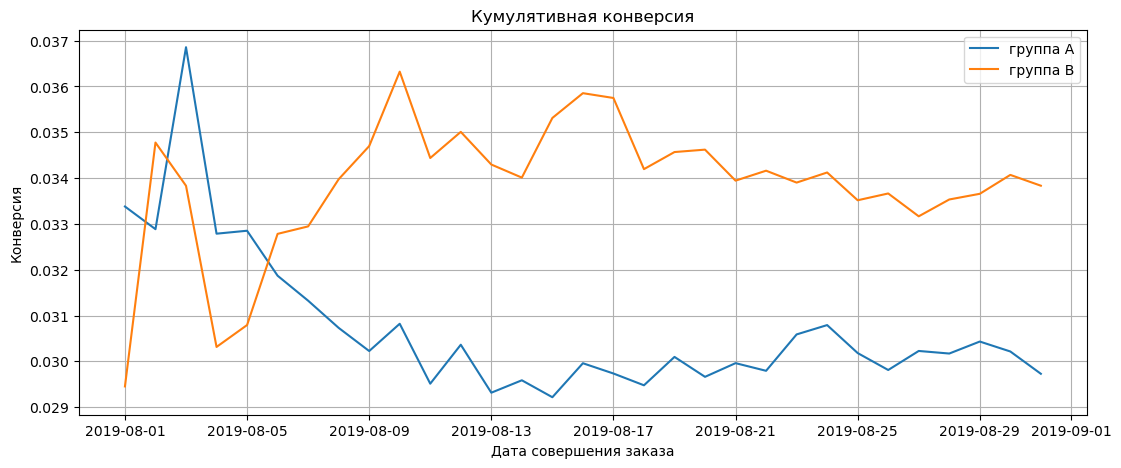

In [37]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(13,5))
plt.ylabel("Конверсия")
plt.xlabel("Дата совершения заказа")
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='группа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='группа B')
plt.title('Кумулятивная конверсия')
plt.legend();

На графике видно, что конверсия в начале месяца у группы А была больше чем у группы B. 3 августа конверсия достигла своего пика. После пика началось резкое падение и 9 августа конверсия составила чуть более 0,030. После 06 августа конверсия группы В выше чем у группы А. 

### График относительного изменения кумулятивной конверсии.

Построим график относительного изменения кумулятивной конверсии. 

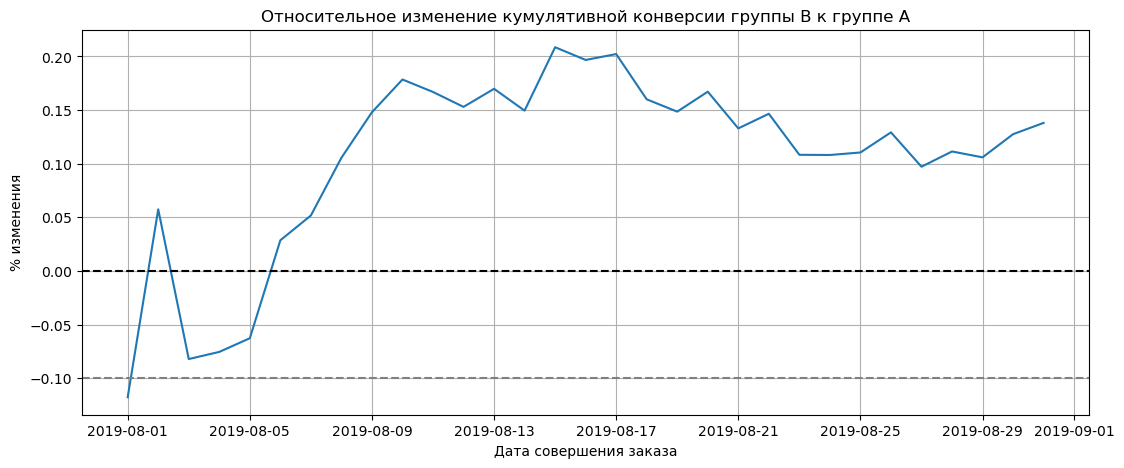

In [38]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], \
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(13,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.ylabel("% изменения")
plt.xlabel("Дата совершения заказа")
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=-0.1, color='grey', linestyle='--');

На графике видно что конверсия группы А была выше группы B в период с 3 по 5 августа. Далее конверсия группы B показывает рост и достигает 20% прироста к 15 августа 2019 года. 

### Точечный график количества заказов по пользователям.

Построим график количества заказов по пользователям.

In [39]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False). \
                                                                        agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['user_id','orders']
ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


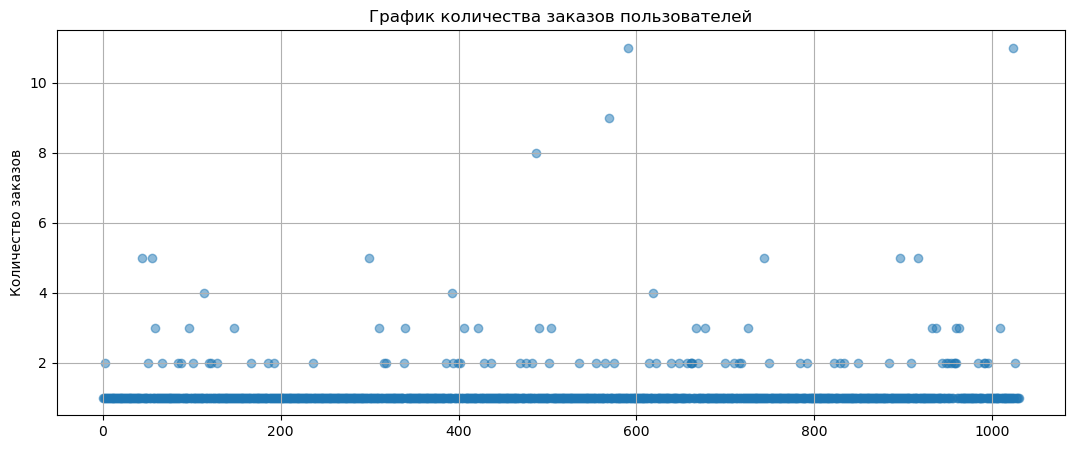

In [40]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(13,5))
plt.title('График количества заказов пользователей')
plt.ylabel("Количество заказов")
plt.grid()
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5);

Чаще всего пользователи совершали 1 заказ. Количество пользователей, которые совершили 2 заказа намного меньше. Пользователей кто совершил 3 заказа еще меньше. Нельзя сделать однозначный вывод является ли данная группа пользователей аномалией или нет. Для определения границы аномальных пользователей расчитаем 95-ый и 99-ый перцентили.

### Расчёт 95 и 99 перцентелей количества заказов на пользователя.

Для того чтобы выбрать границу для определения аномальных пользователей необходимо рассчитать 95-ый и 99-ый перцентили.

In [41]:
print('Рассчитаем 95 и 99 перцентили по заказам : ', np.percentile(ordersByUsers['orders'], [95, 99])) 

Рассчитаем 95 и 99 перцентили по заказам :  [2. 4.]


In [42]:
percentile_orders_95 = np.percentile(ordersByUsers['orders'], 95)
percentile_orders_99 = np.percentile(ordersByUsers['orders'], 99)

Большинство пользователей совершают не более 2 заказов, а  99 не более 4 заказов. Все что свыше 4 заказов будем считать аномалией.

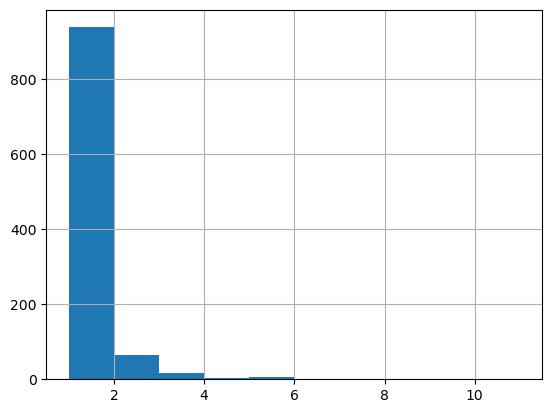

In [43]:
ordersByUsers['orders'].hist();

### Точечный график стоимости заказов.

Построим точечный график стоимости заказов.

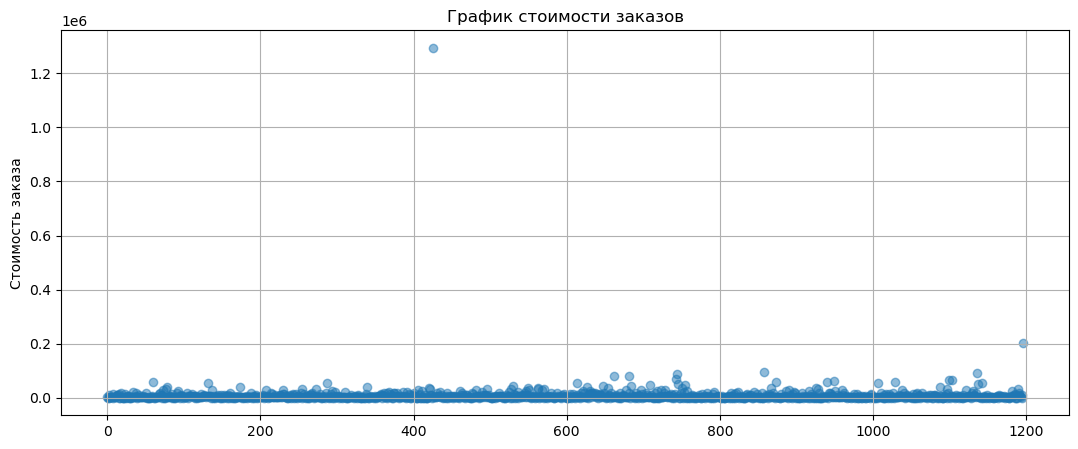

In [44]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(13,5))
plt.grid()
plt.title('График стоимости заказов')
plt.ylabel("Стоимость заказа")
plt.scatter(x_values, orders['revenue'], alpha=0.5);

График наглядно показывает аномально большие заказы. Заказ на 1.2 млн руб и заказ на 200 тыс. руб. Остальные заказы в пределах нормы и не сильно выбиваются из общих значений.

### Расчёт 95 и 99 перцентелей стоимости заказов.

In [45]:
print('Расчёт 95 и 99 перцентили стоимости заказов: ', np.percentile(orders['revenue'], [95, 99])) 

Расчёт 95 и 99 перцентили стоимости заказов:  [28000.  58233.2]


In [46]:
percentile_revenue_99 = np.percentile(orders['revenue'], 99)

У 99% пользователей стоимость заказов не превышает 58233.2 руб. Выберем данное значение в качестве пограничного. 

### Расчёт статистической значимости в среднем количестве заказов.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Для расчёта статистической значимости необходимо создать несколько таблиц и объединить их. Также необзодимо добавить кумулятивные данные.

Необходимо применить p-value. В переменной sampleA добавим значения, всех элементов соответствующим количеству заказов каждого пользователя. Для расчёта конверсии в группе необходимо разделить сумму заказов на число пользователей. Найдем среднее в выборке sampleA методом mean(). Также найдем конверсия для группы sampleB.

In [47]:
total_user_A = visitors.loc[visitors['group']=='A']['visitors']
total_user_B = visitors.loc[visitors['group']=='B']['visitors']

In [48]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(total_user_A.sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(total_user_B.sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Для расчёта относительного прироста конверсии группы B необходимо разделить конверсию группы В на разницу конверсии группы А и единицы. 
Уровень статистической значимости примем равным 5%.
Нулевую гипотезу определим как: Статистически значимые различия между группами отсутствуют. 
Альтернативную гипотезу определим как: Статистически значимые различия есть.

В случае, когда в данных есть большие (по сравнению с нормальным распределением) выбросы, алгебраические метрики работают плохо. Да, они учитывают все значения. Но в этом также их слабое место: одно выбивающееся значение существенно влияет на результат.
Поэтому в нашем случае прекрасно подойдет Непараметрический тест Уилкоксона-Манна-Уитни (st.mannwhitneyu). 

In [49]:
print("alpha =",0.05)
print("p-value = {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("Относительный показатель 'группы B' и 'группы A' = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

alpha = 0.05
p-value = 0.01679
Относительный показатель 'группы B' и 'группы A' = 0.138


Значение p-value равно 0.01679 что меньше 0.05. Следовательно различия между конверсиями групп А и В присутствуют. Относительный показатель равен 13,8%. Это прирост количества покупок группы В над группой А.

### Расчёт статистической значимости различий в среднем чеке (сырые данные).

Посчитаем статистическую значимость различий в среднем чеке между группами по «сырым» данным.

Для расчёта статистической значимости различий в среднем чеке между двумя группами, воспользуемся критерием Манна-Уитни.
Критический уровень статистической значимости примем равным 5%. 

Нулевую гипотезу определим так: Статистически значимые различия между группами отсутствуют. 
Альтернативную гипотезу определим как: Статистически значимые различия есть.

In [50]:
print("alpha =",0.05)
print("p-value = {0:.5f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha = 0.05
p-value = 0.72929
Относительный показатель 'B' и 'A' = 0.259


p-value больше 0.05. Нулевая гипотеза подтвердилась а значит статистически значимые различия между группами отсутствуют. Относительный показатель групп В и групп А равен ~26%. В данном случае прирост в 26% является аномалией, которой является большой заказ № 590470918.

### Расчёт статистической значимости различий в конверсии между группами.

Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

Ранее в качестве аномальных значений были приняты пользователи, которые совершили 3 и более заказов. Также в качестве пограничного значения стоимости заказа мы обозначили сумму 58233.2 руб. Необходимо сделать срез пользователей с числом заказов больше трех а также с заказами дороже 58233.2 руб. Данные переменные обозначим как: usersWithManyOrders и usersWithExpensiveOrders. Данные значения добавим в таблицу abnormalUsers.

In [51]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > percentile_orders_95]['userId'], ordersByUsersB[ordersByUsersB['orders'] > percentile_orders_95]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > percentile_revenue_99]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print ('Количество аномальных пользователей:', len(abnormalUsers))

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64
Количество аномальных пользователей: 31


Посчитаем статистическую значимость различий конверсий между двумя группами теста с использованием очищенных данных. 
Узнаем, как их действия повлияли на результаты теста. 

In [52]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(total_user_A.sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(total_user_B.sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0)

Применим критерий Манна-Уитни к полученным группам. В качестве нулевой гипотезы определим следующий тезис: Статистически значимые различия между группами отсутствуют. 
Альтернативную гипотезу определим как: Статистически значимые различия есть. Уровень статистической значимости alpha примем равным 5%.

In [53]:
print("alpha =",0.05)
print("p-value = {0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный показатель 'Группа B' и 'Группа A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

alpha = 0.05
p-value = 0.01007
Относительный показатель 'Группа B' и 'Группа A' = 0.174


Значение p-value = 0.014 следовательно нулевую гипотезу отвергаем. В нашем случае подтвеждается альтернативная гипотеза - статистически значимые различия в конверсии между двумя группами присутствует. Относительный показатель равен 15,1%. Группа В более успешна чем группа А. 

### Расчёт статистической значимости различий в среднем чеке (очищенные данные).

Используя очищенные данные посмотрим изменятся ли результаты. Нулевую гипотезу определим так: Статистически значимые различия между группами отсутствуют. 
Альтернативную гипотезу определим как: Статистически значимые различия есть. Уровень статистической значимости alpha примем равным 5%.

In [54]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительный показатель 'Группа B' и 'Группа A' = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

alpha = 0.05
p-value = 0.798
Относительный показатель 'Группа B' и 'Группа A' = -0.020


Значение P-value больше 0.05. Нулевая гипотеза подтверждена, следовательно различий в среднем чеке между группами нет. Если сравнивать результаты с использованием сырых данных то там различия составляли ~ 26%. Вероятно причина в аномалиях. 

### Выбор решения по результатам теста.

**В результате проведения AB теста обнаружены следующие моменты:**  

1) Разница в конверсии между группа А и В присутствует как и с использованием сырых так и с применением очищенных данных.
Относительный показатель группы В равен 13,8% с использованием сырых данных и 15,1 по очищенным. 

2) При использовании сырых данных при расчёте среднего чека разница составила ~26%. Причиной этому является аномально большой заказ(1,3 млн руб) под номером 425. После фильтрации данных, в результате расчёта с использованием очищенных данных разница практически выравнивается.  

3) На основе полученных данных можно принять решение об остановке тестирования и признании успеха группой В над А. Конверсия в группе В практически на 20% больше чем в группе А. Стоит отметить, что после устранения аномалий средний чек в обоих группах отличается незначительным образом. 